In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc # 한글 폰트 사용

plt.rcParams["font.family"] = "malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 신혼부부파일 + map_korea와 머지하기(행정구역 기준)
# 값 일치하지 않아도 보존(outer) -> 결측치 확인하고 처리하기
# 지도 그려보기

In [3]:
dfm = pd.read_csv('data/신혼부부_0630.csv', encoding='utf-8', sep=',')
dfk = pd.read_csv('data/map_korea_0630.csv',encoding='utf-8', sep=',')

((261, 6), (229, 7))

In [9]:
dfk.shape, dfk.head()

((229, 7),
       인구수 shortName   x  y       면적 광역시도 행정구역
 0  202520        강릉  11  4  1040.07  강원도  강릉시
 1   25589    고성(강원)   9  0   664.19  강원도  고성군
 2   86747        동해  11  5   180.01  강원도  동해시
 3   63986        삼척  11  8  1185.80  강원도  삼척시
 4   76733        속초   9  1   105.25  강원도  속초시)

In [8]:
for i in range(len(dfk.index)):
    if dfk.행정구역[i][-1] == ')':
        print(dfk.행정구역[i])
    else:
        pass

In [10]:
dfk.행정구역[4]

'속초시'

In [6]:
dfm.shape, dfm.head()

((261, 6),
     광역시도 행정구역 shortName  신혼수_21  신혼증감_21  신혼증감률_21
 0  서울특별시  종로구        종로    1851     -238     -11.4
 1  서울특별시   중구        중구    2421     -277     -10.3
 2  서울특별시  용산구        용산    4622     -140      -2.9
 3  서울특별시  성동구        성동    6754     -876     -11.5
 4  서울특별시  광진구        광진    5806     -751     -11.5)

In [6]:
dfk = dfk.reindex(columns=['광역시도','행정구역','shortName','면적','인구수','x','y'])
dfk.tail(3)

,광역시도,행정구역,shortName,면적,인구수,x,y
226,충청북도,진천군,진천,406.08,62809,5,11
227,충청북도,청주시,청주,932.51,790216,6,12
228,충청북도,충주시,충주,983.70,198077,6,10


In [18]:
# 맵을 그리기위한 코드-> 함수

def mapping(targetData, blockedMap, d1, d2, cmapname):
    blockedMap = df_k
    gamma = 0.75
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
# for문 변형함 #####################################################################################
        # # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]
#####################################################################################
        # if row[d1].endswith('시') and not row[d1].startswith('세종'):
            # dispname = f'{row[d2][:-1]}'
            # if len(row[d2]) <= 2:
                # dispname += row[d2][-1]
        # else:
            # dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

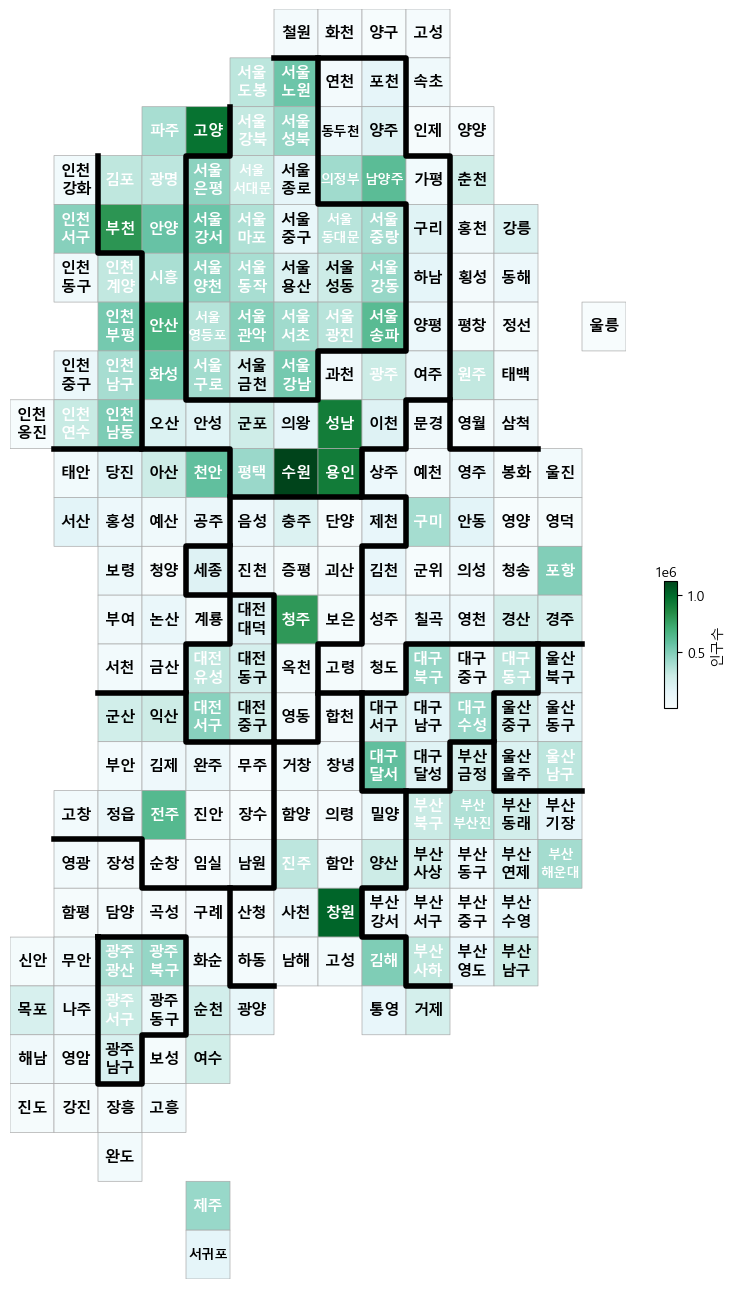

In [20]:
# 함수실행__ mapping(targetData, blockedMap, d1, d2, cmapname)
mapping('인구수', dfk, '광역시도', '행정구역', 'BuGn')

In [ ]:
##################################################
# df_test_k 버전

In [ ]:
# 맵을 그리기위한 코드-> 함수

def mapping(targetData, blockedMap, d1, d2, cmapname):
    blockedMap = dfk
    gamma = 0.75
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    # k_name_list = []
    # del_list = ['광주', '대구', '대전', '부산', '서울', '울산', '인천']
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
# for문 변형함 #####################################################################################
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]
#####################################################################################
    # # for i in range(len(blockmap.idx)):
    #     if (len(bolckmap['shortName'][i]) >=3) and (bolckmap['shortName'][i][:2] in del_list):
    #         k_name_list.append(bolckmap['shortName'][i][2:])
    #     elif (len(bolckmap['shortName'][i]) >=5) and (bolckmap['shortName'][i][-1] == ')'):    # 고성(강원)
    #         k_name_list.append(bolckmap['shortName'][i][:2])
    #     else:
    #         k_name_list.append(bolckmap['shortName'][i])
    # blockmap['shortName'] = k_name_list
    # dispname = blockmap['shortName']
#######################################################################

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [21]:
######## korea의 shortname에서 광역시 이름 빼기 ####
k_name_list = []
del_list = ['광주', '대구', '대전', '부산', '서울', '울산', '인천']
for i in range(len(dfk.index)):
    if (len(dfk['shortName'][i]) >=3) and (dfk['shortName'][i][:2] in del_list):
        k_name_list.append(dfk['shortName'][i][2:])
    elif (len(dfk['shortName'][i]) >=5) and (dfk['shortName'][i][-1] == ')'):    # 고성(강원)
        k_name_list.append(dfk['shortName'][i][:2])
    else:
        k_name_list.append(dfk['shortName'][i])

In [22]:
dfk['shortName'] = k_name_list
dfk['shortName']

typing.Literal[<no_default>]
0      강릉
1      고성
2      동해
3      삼척
4      속초
       ..
224    제천
225    증평
226    진천
227    청주
228    충주
Name: shortName, Length: 229, dtype: object

In [14]:
dfk.isna().sum().sum()

0

In [15]:
dfk.head(), dfk.shape

(      인구수 shortName   x  y       면적 광역시도 행정구역
 0  202520        강릉  11  4  1040.07  강원도  강릉시
 1   25589        고성   9  0   664.19  강원도  고성군
 2   86747        동해  11  5   180.01  강원도  동해시
 3   63986        삼척  11  8  1185.80  강원도  삼척시
 4   76733        속초   9  1   105.25  강원도  속초시,
 (229, 7))

In [24]:
dfm.shortName.tolist()

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '기장',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '미추홀',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종',
 '수원',
 '장안',
 '권선',
 '팔달',
 '영통',
 '성남',
 '수정',
 '중원',
 '분당',
 '의정부',
 '안양',
 '만안',
 '동안',
 '부천',
 '광명',
 '평택',
 '동두천',
 '안산',
 '상록',
 '단원',
 '고양',
 '덕양',
 '일산동',
 '일산서',
 '과천',
 '구리',
 '남양주',
 '오산',
 '시흥',
 '군포',
 '의왕',
 '하남',
 '용인',
 '처인',
 '기흥',
 '수지',
 '파주',
 '이천',
 '안성',
 '김포',
 '화성',
 '광주',
 '양주',
 '포천',
 '여주',
 '연천',
 '가평',
 '양평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '태백',
 '속초',
 '삼척',
 '홍천',
 '횡성',
 '영월',
 '평창',
 '정선',
 '철원',
 '화천',
 '양구',
 '인제',
 '고성',
 '양양',
 '

In [34]:
# # Merge based on conditions
df_mk = dfm.merge(dfk, on=['shortName', '광역시도'], how='outer')   # 두 열이 일치해야 병합
# df_mk['Partial Match'] = df_mk.apply(lambda row: row['행정구역_x'] in row['행정구역_y'], axis=1)
# df_mk.head(3)

,광역시도,행정구역_x,shortName,신혼수_21,신혼증감_21,신혼증감률_21,행정구역_y,면적,인구수,x,y,Partial Match
0,세종특별자치시,세종시,세종,10029,-639,-6.0,세종시,465.23,191233,4,11,True
1,경기도,수원시,수원,23385,-1396,-5.6,수원시,121.09,1125461,6,9,True
2,경기도,성남시,성남,17184,-1056,-5.8,성남시,141.82,911628,7,8,True


In [27]:
############## 출생인구df + 연령별인구df merge ##############
# merge 
df_mk =  pd.merge(dfk, dfm, on=['shortName', '광역시도'], how='outer')    # how='outer'을 써야 손실없이 병합됨.
df_mk.head(3)

,인구수,shortName,x,y,면적,광역시도,행정구역_x,행정구역_y,신혼수_21,신혼증감_21,신혼증감률_21
0,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,강릉시,3079.0,-103.0,-3.2
1,25589.0,고성,9.0,0.0,664.19,강원도,고성군,고성군,257.0,-4.0,-1.5
2,86747.0,동해,11.0,5.0,180.01,강원도,동해시,동해시,1257.0,-68.0,-5.1


In [28]:
df_mk.shape

(263, 11)

In [ ]:
############# dfk dfm 서로에게 없는 행값 찾기 ###########
# dfk.shape = 229
# dfm.shape = 261
df_mk.shape = 263, 11

In [32]:
df_unique = dfk[~dfk['shortName'].isin(dfm['shortName'])]
df_unique

,인구수,shortName,x,y,면적,광역시도,행정구역
typing.Literal[<no_default>],,,,,,,
114,365721,진,10,16,29.7,부산광역시,부산진구


In [36]:
df_unique2 = df_mk[~df_mk['shortName'].isin(dfk['shortName'])]
df_unique2

,인구수,shortName,x,y,면적,광역시도,행정구역_x,행정구역_y,신혼수_21,신혼증감_21,신혼증감률_21
229,NaN,부산진,NaN,NaN,NaN,부산광역시,NaN,부산진구,5709.0,-174.0,-3.0
230,NaN,미추홀,NaN,NaN,NaN,인천광역시,NaN,미추홀구,6541.0,-71.0,-1.1
231,NaN,장안,NaN,NaN,NaN,경기도,NaN,장안구,3917.0,18.0,0.5
232,NaN,권선,NaN,NaN,NaN,경기도,NaN,권선구,7403.0,-830.0,-10.1
233,NaN,팔달,NaN,NaN,NaN,경기도,NaN,팔달구,3188.0,499.0,18.6
234,NaN,영통,NaN,NaN,NaN,경기도,NaN,영통구,8878.0,-1083.0,-10.9
235,NaN,수정,NaN,NaN,NaN,경기도,NaN,수정구,4525.0,-371.0,-7.6
236,NaN,중원,NaN,NaN,NaN,경기도,NaN,중원구,3664.0,-94.0,-2.5
237,NaN,분당,NaN,NaN,NaN,경기도,NaN,분당구,8996.0,-591.0,-6.2
238,NaN,만안,NaN,NaN,NaN,경기도,NaN,만안구,4452.0,-68.0,-1.5


In [37]:
df_mk2= df_mk.dropna()

In [38]:
df_mk2.shape

(227, 11)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

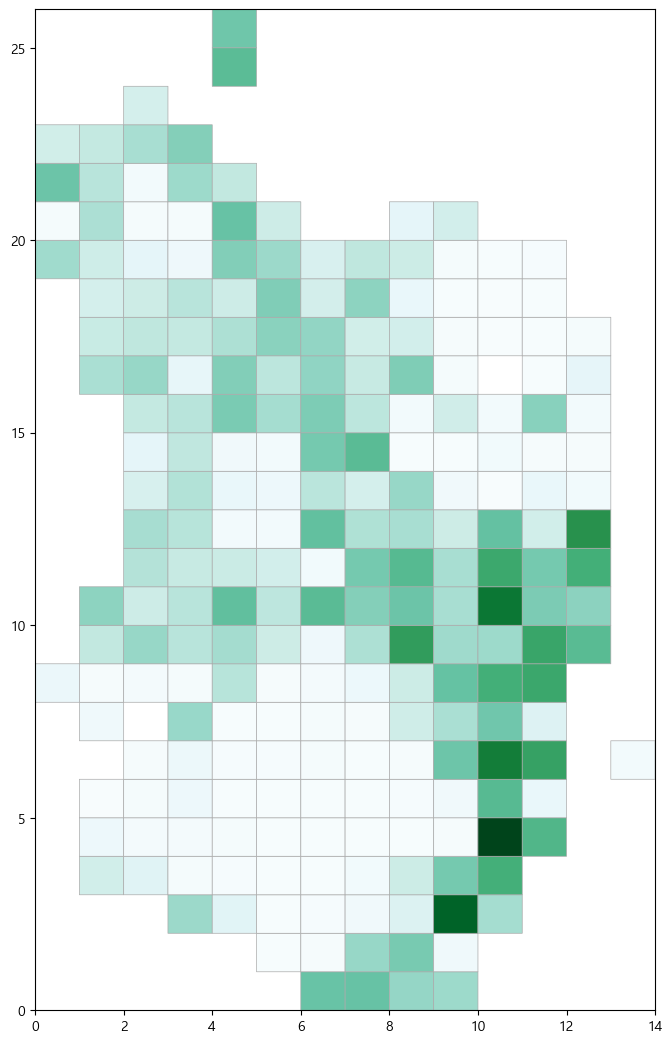

In [41]:
# 함수실행__ mapping(targetData, blockedMap, d1, d2, cmapname)
mapping('면적', df_mk2, '광역시도', '행정구역_x', 'BuGn')